In [269]:
# Plot the snapshots of fluctuating w a,d theta from 3D LES data
#AG # 24/12/2021
##### Oceananigan.jl LES data is used


#%matplotlib notebook
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
import pandas as pd  
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# path to file
#pathles="/Users/amrapallig/run/cvmix_analysis/les/"
#path="/Users/amrapalli/runs/cvmix/cvmix_analysis/adc/convection/"

path_oc="/Users/amrapallig/Desktop/Oceananigan/cooling/"
les_oc=Dataset(path_oc+"Cooling4_fields_dxp5_copy_1.nc", mode='r') # data saved each 24 hr total run of 24 hr

In [270]:
les_oc.variables.keys()

dict_keys(['zC', 'zF', 'xC', 'yF', 'xF', 'yC', 'time', 'v', 'S', 'w', 'T', 'u'])

In [271]:
#read data

# Data for a three-dimensional line
z = les_oc.variables["zC"]  #256
x = les_oc.variables["xC"]  #256
y = les_oc.variables["yC"]  #256


# Data for three-dimensional scattered points
#data is saved upside down means, z[0] is bottom depth and z[-1] is top
w = les_oc.variables["w"][:,:,:,:]   #[t,z,y,x] (2, 257, 256, 256)  t=0, t=1=24 hr
u = les_oc.variables["u"][:,:,:,:]   #[t,z,y,x] (2, 257, 256, 256)
v = les_oc.variables["v"][:,:,:,:]   #[t,z,y,x] (2, 257, 256, 256)
T = les_oc.variables["T"][:,:,:,:]   #[t,z,y,x] (2, 257, 256, 256)

In [272]:
#plt.plot(T[1,:,2,2],z)
#print(z[:])

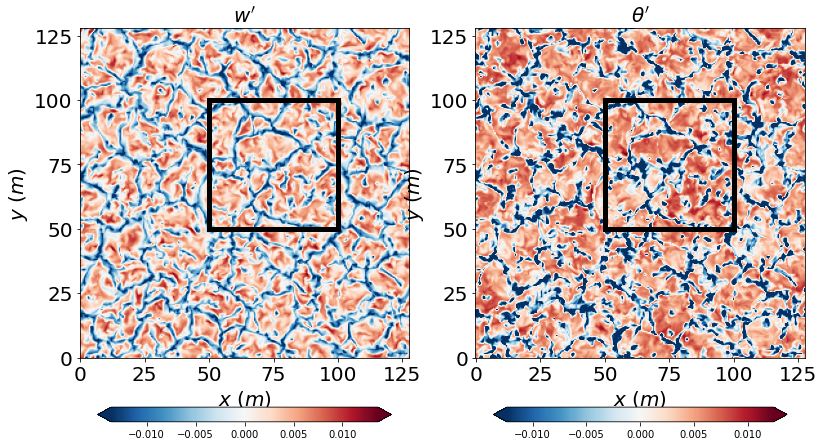

In [273]:

t=1 # t=1 means 24 hr simulation for file:Cooling4_fields_dxp5_copy_1
z=-8 # vertical depth for horizontal slice


# vel and temp are horozontal 2D data corresponding to time t and depth z
#fluctuating velocity, subtracting np.nanmean(w[t,z,:,:] is not required as np.nanmean(w[t,z,:,:]=0, Still included, 
vel = w[t,z,:,:]-np.nanmean(w[t,z,:,:],axis=(0,1)) 
#fluctuating temp, subtracting np.nanmean(T[t,z,:,:] from instantaneous values 
temp = T[t,z,:,:]-np.nanmean(T[t,z,:,:],axis=(0,1))


fig = plt.figure(figsize=(13,9))

plt.subplot(121)
plt.imshow(vel,cmap='RdBu_r', vmin=-np.max(vel))
plt.colorbar( extend='both',location="bottom",fraction=0.03, pad=0.1);
plt.title("$w^\prime$",fontsize=20)
plt.xticks([0,50,100,150,200,250], [0,25,50,75,100,125],fontsize=20) # changed from grid point to distance
plt.yticks([0,50,100,150,200,250], [0,25,50,75,100,125],fontsize=20) # inverted y axis label
plt.xlabel('$x$ $(m)$',fontsize=20)
plt.ylabel('$y$ $(m)$',fontsize=20)

plt.gca().invert_yaxis()
#plt.show()

## including a patch for zoomed plot
from matplotlib.patches import Rectangle
plt.gca().add_patch(Rectangle((100,200),100,-100,linewidth=5,edgecolor='k',facecolor='none'))



plt.subplot(122)
plt.imshow(temp,cmap='RdBu_r', vmin=-np.max(temp))
plt.colorbar( extend='both',location="bottom",fraction=0.03, pad=0.1);
plt.title("$\\theta^\prime$",fontsize=20)
plt.xticks([0,50,100,150,200,250], [0,25,50,75,100,125],fontsize=20)
plt.yticks([0,50,100,150,200,250], [0,25,50,75,100,125],fontsize=20)
plt.xlabel('$x$ $(m)$',fontsize=20)
plt.ylabel('$y$ $(m)$',fontsize=20)
plt.gca().invert_yaxis()


## including a patch for zoomed plot
from matplotlib.patches import Rectangle
plt.gca().add_patch(Rectangle((100,100),100,100,linewidth=5,edgecolor='k',facecolor='none'))


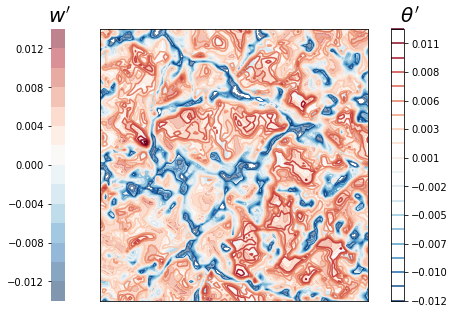

In [274]:

# plot for selected path
fig= plt.figure(figsize=(8,5))

a1=plt.contour(temp[100:200,100:200],levels=list(np.round(np.linspace(-np.max(temp), np.max(temp), num=20),decimals=3)),cmap='RdBu_r', vmin=-np.max(temp))
a2=plt.contourf(vel[100:200,100:200],levels=list(np.round(np.linspace(-np.max(vel), np.max(vel), num=15),decimals=3)),cmap='RdBu_r', vmin=-np.max(temp),alpha=0.5)
#plt.colorbar( extend='both',location="bottom");

plt.xticks([])
plt.yticks([])
c1=plt.colorbar(a1)
#c1.set_label('$w^\prime$', fontsize=14 ,rotation=0)

c2=plt.colorbar(a2,location="left")
#c2.set_label('$\\theta^\prime$', fontsize=14 ,ha="left",y=0.5)
c2.outline.set_visible(False)

#c1.outline.set_visible(False)
plt.title("$w^\prime \quad \qquad \qquad  \qquad \qquad \qquad \qquad  \qquad \qquad    \\theta^\prime$ ",fontsize=20)

# because ofthe way data are saved, 
#plt.gca().invert_yaxis()
plt.show()





Text(0.5, 0, '$\\theta\\prime$')

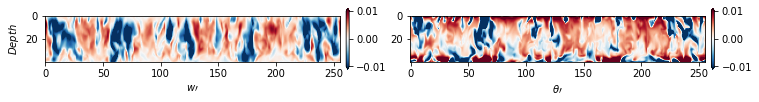

In [275]:
fig = plt.figure(figsize=(12,8))
yslice=10
t=1
d=40
w1=w[:,-d:,:,:]
w_mean=(np.mean(w1[t,:,:,:],axis=(1,2)))
x = w_mean
y = np.tile(x[:, np.newaxis, np.newaxis], (1, 256, 256))
vel = np.flip(w1[t,:,:,yslice]-y[:,:,yslice])


T1=T[:,-d:,:,:]
T_mean=(np.mean(T1[t,:,:,:],axis=(1,2)))
x = T_mean
y = np.tile(x[:, np.newaxis, np.newaxis], (1, 256, 256))
temp = np.flip(T1[t,-d:,:,yslice]-y[-d:,:,yslice])


plt.subplot(121)
m2=plt.imshow(vel,cmap='RdBu_r', vmin=-0.01, vmax=+0.01)
#plt.colorbar( extend='both',location='right');
plt.colorbar(m2, fraction=0.01, pad=0.02, extend='both')
#plt.ylim(0,30)
#plt.gca().invert_yaxis()
plt.xlabel("$w\prime$")
plt.ylabel("$Depth $")

plt.subplot(122)

#plt.imshow(c3,cmap='RdBu_r', vmin=-np.max(c3))
m3=plt.imshow(temp,cmap='RdBu_r', vmin=-0.01, vmax=+0.01)
#plt.colorbar( extend='both',location='right');
plt.colorbar(m3, fraction=0.01, pad=0.02, extend='both')

#plt.ylim(0,35)
#plt.gca().invert_yaxis()
plt.xlabel("$\\theta\prime$")


(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40]),
 [Text(0, 0, '0'),
  Text(0, 5, '-5'),
  Text(0, 10, '-10'),
  Text(0, 15, '-15'),
  Text(0, 20, '-20'),
  Text(0, 25, '-25'),
  Text(0, 30, '-30'),
  Text(0, 35, '-35'),
  Text(0, 40, '-40')])

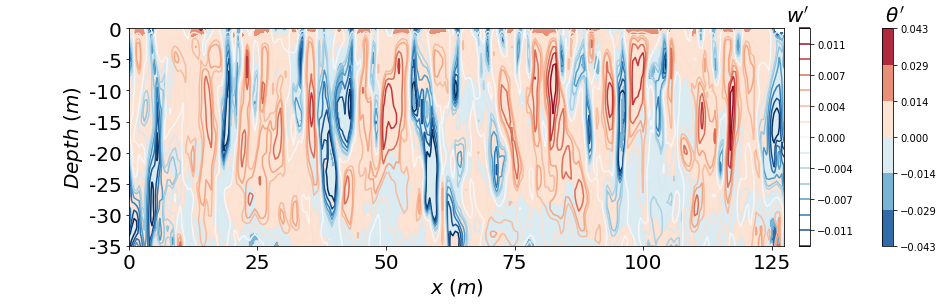

In [287]:
fig = plt.figure(figsize=(15,4))

# horizontal slice to show vertical cross section 
yslice=64
t=1   # 24 hr
d=40  # depth 

w1=w[:,-d:,:,:]
w_mean=(np.mean(w1[t,:,:,:],axis=(1,2)))
xw = w_mean
yw = np.tile(xw[:, np.newaxis, np.newaxis], (1, 256, 256)) #repmat along new axis for easier calculation
vel = np.flip(w1[t,:,:,yslice]-yw[:,:,yslice])


T1=T[:,-d:,:,:]
T_mean=(np.mean(T1[t,:,:,:],axis=(1,2)))
xt = T_mean
yt = np.tile(xt[:, np.newaxis, np.newaxis], (1, 256, 256)) #repmat along new axis for easier calculation
temp = np.flip(T1[t,:,:,yslice]-yt[:,:,yslice])

a1=plt.contourf(temp,levels=list(np.round(np.linspace(-np.max(temp), np.max(temp), num=7),decimals=3)),cmap='RdBu_r', vmin=-np.max(temp), vmax=np.max(temp),alpha=0.9)
a2=plt.contour(vel,levels=list(np.round(np.linspace(-np.max(vel), np.max(vel), num=15),decimals=3)),cmap='RdBu_r', vmin=-np.max(vel), vmax=np.max(vel))

plt.xlabel('$x$ $(m)$',fontsize=20)
plt.ylabel('$Depth$ $(m)$',fontsize=20)
#plt.gca().invert_yaxis()
plt.xticks([0,50,100,150,200,250], [0,25,50,75,100,125]);
plt.yticks([0,5,10,15,20,25,30,35,40], [0,-5,-10,-15,-20,-25,-30,-35,-40]);
plt.ylim(35,0)
c1=plt.colorbar(a1,fraction=0.1, pad=0.01)
c2=plt.colorbar(a2,location="right",fraction=0.1, pad=0.02)
plt.title("$ \qquad \qquad  \qquad \qquad \qquad \qquad  \qquad \qquad\qquad\qquad \qquad \qquad  \qquad \qquad\qquad\qquad     \qquad \qquad    \qquad \qquad w^\prime\qquad \qquad \\theta^\prime$ ",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)